In [ ]:
# Allow Collab to connect to your Drive
from google.colab import drive
drive.mount('/content/drive')

# Path to the data on Drive
root = "/content/drive/MyDrive/PhD/Integrated_Gradient"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
from scipy.stats import chi2, norm
import matplotlib.pyplot as plt


In [ ]:
# Linear interpolation
def linear(z1, z2, alpha):
    return np.array([a * z2 + (1 - a) * z1 for a in alpha])
    

In [ ]:
# spherical linear interpolation (slerp)
def slerp(z1, z2, alpha):
    omega = np.arccos(np.sum(z1 / np.linalg.norm(z1, axis = -1, keepdims = True) \
                           * z2 / np.linalg.norm(z2, axis = -1, keepdims = True), axis = -1, keepdims = True))
    so = np.sin(omega)
    return np.array([np.sin((1 - a) * omega) / so * z1 + np.sin(a * omega) / so * z2 for a in alpha]), omega
    

[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]


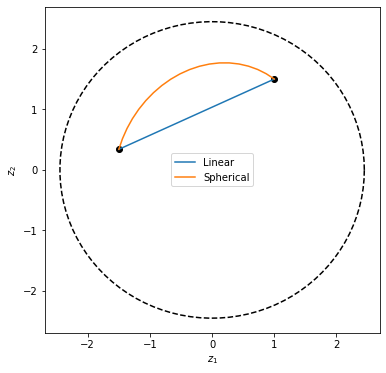

In [ ]:
# Simple example
z1 = np.array([1, 1.5])
z2 = np.array([-1.5, 0.34])

alpha = np.linspace(0, 1, 20)
print(alpha)
lin_interp = linear(z1, z2, alpha)
sph_interp, _ = slerp(z1, z2, alpha)

angle = np.linspace(0, 2 * np.pi, 100)
radius = np.sqrt(chi2.ppf(0.95, 2))

plt.figure(figsize=(6, 6))
plt.plot(radius * np.cos(angle), radius * np.sin(angle), 'k--')
plt.scatter(z1[0], z1[1], c = "k")
plt.scatter(z2[0], z2[1], c = "k")
plt.plot(lin_interp[:, 0], lin_interp[:, 1], label = "Linear")
plt.plot(sph_interp[:, 0], sph_interp[:, 1], label = "Spherical")
plt.xlabel("$z_1$")
plt.ylabel("$z_2$")
plt.legend()
plt.savefig(f"{root}/results/Interpolation/Linear_vs_Spherical.pdf", bbox_inches='tight')


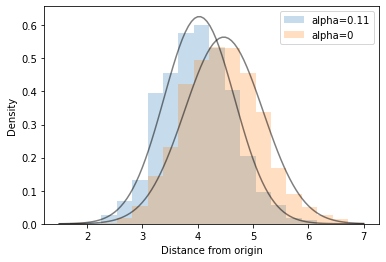

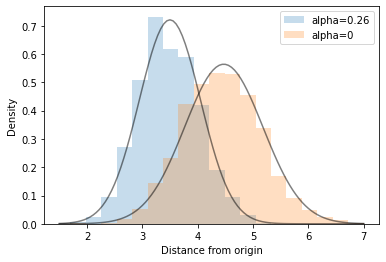

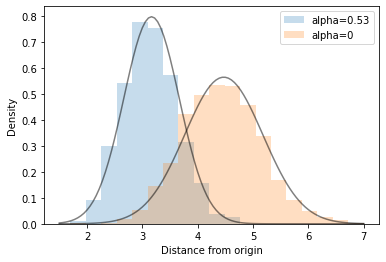

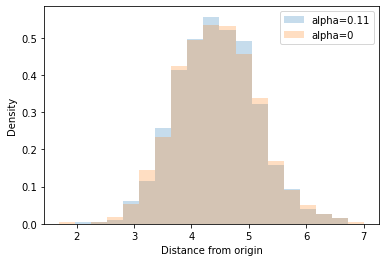

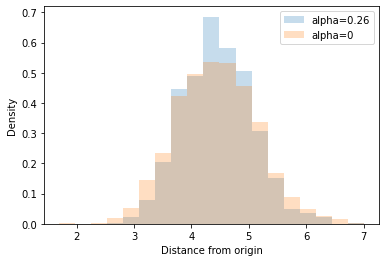

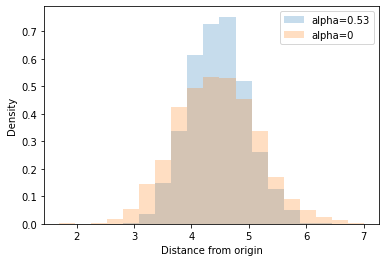

In [ ]:
# Sample normal data
d = 20
samples = np.random.randn(1000, d)

dist_range = np.linspace(1.5, 7, 100)
dist_bins = np.linspace(1.7, 7, 20)
lin_interp_samples = linear(samples[:-1, :], samples[1:, :], alpha)
sph_interp_samples, angles = slerp(samples[:-1, :], samples[1:, :], alpha)

for i in [2, 5, 10]:
    plt.figure()
    a = alpha[i]
    plt.hist(np.linalg.norm(lin_interp_samples[i], axis = 1), label = f"alpha={a:.2f}", alpha = 0.25, bins = dist_bins, density = True)
    sigma = a ** 2 + (1 - a) ** 2
    density = norm.pdf(dist_range, loc = np.sqrt(sigma * d), scale = np.sqrt(sigma / 2))
    plt.plot(dist_range, density, 'k', alpha = 0.5)

    plt.hist(np.linalg.norm(lin_interp_samples[0], axis = 1), label = f"alpha=0", alpha = 0.25, bins = dist_bins, density = True)
    density = norm.pdf(dist_range, loc = np.sqrt(d), scale = np.sqrt(1 / 2))
    plt.plot(dist_range, density, 'k', alpha = 0.5)
    plt.legend()
    plt.xlabel("Distance from origin")
    plt.ylabel("Density")
    plt.savefig(f"{root}/results/Interpolation/Linear_density_i_{i}.pdf", bbox_inches='tight')


for i in [2, 5, 10]:
    plt.figure()
    a = alpha[i]
    plt.hist(np.linalg.norm(sph_interp_samples[i], axis = 1), label = f"alpha={a:.2f}", alpha = 0.25, bins = dist_bins, density = True)
    plt.hist(np.linalg.norm(sph_interp_samples[0], axis = 1), label = f"alpha=0", alpha = 0.25, bins = dist_bins, density = True)
    plt.legend()
    plt.xlabel("Distance from origin")
    plt.ylabel("Density")
    plt.savefig(f"{root}/results/Interpolation/Spherical_density_i_{i}.pdf", bbox_inches='tight')

